<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/MLP_regression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多層パーセプトロン (MLP)を用いた回帰
本コードは，sin関数に従うデータを生成（わずかにばらつきをもたせる）し，非線形回帰を試みるものである。

Mean squared error: 0.0150
R-squared score: 0.9719


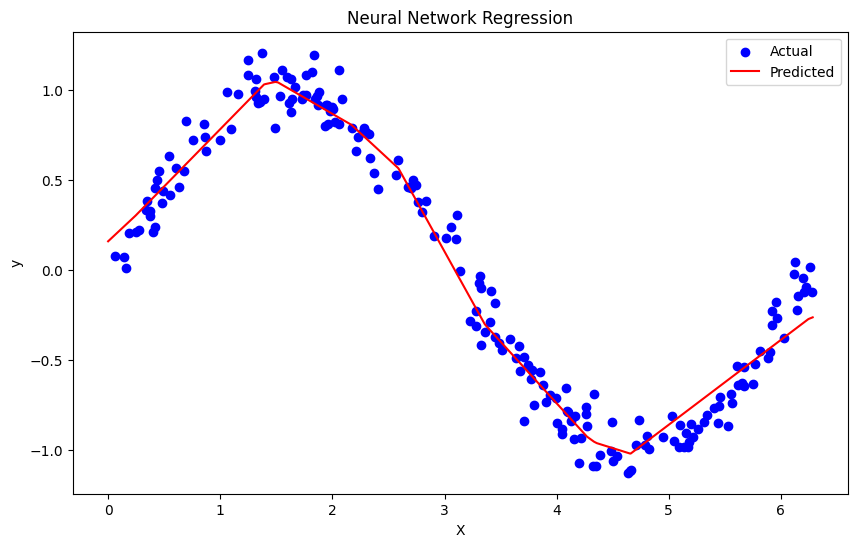

In [ ]:
# MLP を用いた回帰
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# データの生成
np.random.seed(0) # データ生成の再現性を保証するため，シードを設定
data_size = 1000
X = np.linspace(0.0, 2*np.pi, data_size).reshape(-1, 1)
# # y = 2 * X + 1 + np.random.randn(100, 1) * 0.5
y = np.sin(X)  + np.random.randn(data_size, 1) * 0.1

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データの標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ニューラルネットワークモデルの構築
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# モデルの学習
model.fit(X_train_scaled, y_train.ravel())

# モデルの評価
y_pred_test = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean squared error: {mse:.4f}")
print(f"R-squared score: {r2:.4f}")

# 結果の可視化
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')

# 回帰曲線を描画するためのデータ点を生成
X_plot = np.linspace(0.0, 2*np.pi, data_size).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)
y_plot_pred = model.predict(X_plot_scaled)

plt.plot(X_plot, y_plot_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression')
plt.legend()
plt.show()